In [1]:
import networkx as nx
from sklearn.metrics.cluster import normalized_mutual_info_score
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt


#**Community Network**

In [2]:
n = 3000
tau1 = 3
tau2 = 1.5
mu = 0.1
LFR_benchmark_graph = nx.generators.community.LFR_benchmark_graph(n,tau1,tau2,mu,average_degree=5, min_community=20)

In [3]:
G = nx.generators.community.LFR_benchmark_graph(400,tau1,tau2,mu,average_degree=5, min_community=5)

In [4]:
lfr_community = {frozenset(G.nodes[v]["community"]) for v in G}
lrf = sorted(list(i) for i in lfr_community)

def get_list(community):
  comm_lrf=np.zeros(G.number_of_nodes())
  for index,nodes,in enumerate(community):
    for j in nodes:
      comm_lrf[j]=index
  return comm_lrf
comm_lrf=get_list(lrf)

#**Community Detection using girvan_newman method**

In [5]:
gn_community = nx.algorithms.community.girvan_newman(G)
gn_list=list(c for c in next(gn_community))
comm_gn=get_list(gn_list)
print(comm_gn.tolist())

[0.0, 1.0, 1.0, 2.0, 3.0, 1.0, 1.0, 4.0, 4.0, 4.0, 5.0, 6.0, 1.0, 4.0, 5.0, 4.0, 2.0, 7.0, 1.0, 4.0, 4.0, 4.0, 1.0, 3.0, 1.0, 4.0, 1.0, 1.0, 3.0, 8.0, 4.0, 1.0, 4.0, 4.0, 1.0, 1.0, 6.0, 4.0, 1.0, 6.0, 9.0, 3.0, 1.0, 1.0, 1.0, 0.0, 4.0, 0.0, 4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 3.0, 5.0, 0.0, 1.0, 1.0, 4.0, 1.0, 4.0, 3.0, 1.0, 3.0, 4.0, 1.0, 1.0, 4.0, 4.0, 4.0, 1.0, 4.0, 4.0, 1.0, 4.0, 4.0, 1.0, 3.0, 4.0, 4.0, 1.0, 1.0, 4.0, 4.0, 4.0, 1.0, 4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, 3.0, 4.0, 1.0, 4.0, 4.0, 4.0, 4.0, 1.0, 1.0, 4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 4.0, 4.0, 4.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, 1.0, 4.0, 1.0, 1.0, 1.0, 1.0, 3.0, 4.0, 7.0, 5.0, 5.0, 9.0, 6.0, 1.0, 4.0, 3.0, 4.0, 4.0, 3.0, 1.0, 1.0, 4.0, 1.0, 5.0, 2.0, 1.0, 4.0, 1.0, 4.0, 4.0, 4.0, 4.0, 1.0, 1.0, 4.0, 1.0, 7.0, 3.0, 1.0, 4.0, 4.0, 1.0, 4.0, 0.0, 4.0, 3.0, 1.0, 1.0, 0.0, 4.0, 2.0, 0.0, 6.0, 1.0, 4.0, 4.0, 4.0, 4.0, 1.0, 4.0, 4.0, 1.0, 4.0, 7.0, 1.0, 1.0, 1.0, 1.0, 4.0, 4.0, 0.0, 4.0, 8.0, 4.0, 1.0, 1.0, 4.0, 4.0, 4.0,

#**Community Detection using label_propagation method**

In [6]:
lp_community = nx.algorithms.community.label_propagation_communities(G)
lp_list=list(d for d in lp_community)
comm_lp=get_list(lp_list)
print(comm_lp.tolist())

[74.0, 0.0, 87.0, 38.0, 66.0, 79.0, 86.0, 32.0, 70.0, 1.0, 82.0, 2.0, 87.0, 3.0, 43.0, 68.0, 38.0, 4.0, 86.0, 35.0, 64.0, 69.0, 75.0, 66.0, 79.0, 61.0, 87.0, 86.0, 66.0, 76.0, 61.0, 87.0, 68.0, 81.0, 83.0, 23.0, 63.0, 61.0, 58.0, 63.0, 5.0, 56.0, 11.0, 46.0, 79.0, 74.0, 61.0, 74.0, 35.0, 79.0, 6.0, 24.0, 36.0, 53.0, 74.0, 66.0, 43.0, 74.0, 86.0, 79.0, 61.0, 47.0, 78.0, 7.0, 87.0, 28.0, 81.0, 53.0, 47.0, 81.0, 81.0, 81.0, 75.0, 69.0, 8.0, 9.0, 32.0, 69.0, 87.0, 66.0, 69.0, 61.0, 58.0, 52.0, 81.0, 69.0, 68.0, 77.0, 67.0, 58.0, 33.0, 79.0, 52.0, 27.0, 61.0, 47.0, 28.0, 69.0, 52.0, 81.0, 10.0, 85.0, 68.0, 79.0, 11.0, 35.0, 79.0, 52.0, 36.0, 87.0, 12.0, 8.0, 69.0, 13.0, 32.0, 79.0, 47.0, 52.0, 47.0, 71.0, 58.0, 79.0, 35.0, 52.0, 86.0, 52.0, 87.0, 66.0, 61.0, 49.0, 80.0, 82.0, 14.0, 63.0, 77.0, 35.0, 28.0, 35.0, 55.0, 28.0, 87.0, 23.0, 61.0, 83.0, 15.0, 38.0, 47.0, 85.0, 83.0, 78.0, 32.0, 40.0, 32.0, 36.0, 77.0, 54.0, 47.0, 49.0, 28.0, 77.0, 32.0, 54.0, 60.0, 78.0, 74.0, 61.0, 28.0, 23.0, 86

In [7]:
print("NMI score for Girvan-Newman Algorithm:  ",normalized_mutual_info_score(comm_lrf,comm_gn))
print("NMI score for Label Propagation Algorithm:  ",normalized_mutual_info_score(comm_lrf,comm_lp))

NMI score for Girvan-Newman Algorithm:   0.6035629989734469
NMI score for Label Propagation Algorithm:   0.9013521075464404


#**Comminity Detection using 'Label propagation algorithm based on node importance'**
paper : https://www.sciencedirect.com/science/article/pii/S0378437120300042#:~:text=In%20the%20label%20propagation%20process%2C%20when%20the%20nodes%20with%20the,random%20selection%20in%20LPA%20algorithm.

In [8]:
def show(G):
  nx.draw(G,with_labels=True)
  plt.draw()

def Jaccard_distance(G,u,v):
  neighbour_u=set(G.neighbors(u))
  neighbour_v=set(G.neighbors(v))
  union=len(neighbour_u | neighbour_v)
  intersect=len(neighbour_u & neighbour_v)
  d=(union-intersect)/union
  return d

def ks_index(G,ks_index_dict,degree):
  nodes_with_degree_i=[]
  for node in G.nodes:
    if G.degree(node)<=degree:
      ks_index_dict[str(node)]=degree
      nodes_with_degree_i.append(node)
  if len(nodes_with_degree_i)>0:
    G.remove_nodes_from(nodes_with_degree_i)
    ks_index(G,ks_index_dict,degree)
  else: return

def node_importance_index(G,A,u):
  temp=0
  for v in G.neighbors(u):
    if v!=u:
      dist=0;
      try: dist=jaccard_distance_dict[str(u)+" "+str(v)]
      except:dist=jaccard_distance_dict[str(v)+" "+str(u)]
      temp+=dist*ks_index_dict[str(v)]
  hms=A[u-1,u-1]*ks_index_dict[str(u)]*temp
  return hms

In [9]:
pair= [i for i in combinations(G.nodes,2)]
jaccard_distance_dict={}
for u,v in pair:
  jaccard_distance_dict[str(u)+" "+str(v)]=Jaccard_distance(G,u,v)

vertex_list=[]
degree_list=sorted(set([i[1] for i in G.degree]))
ks_index_dict={}
G1=G.copy()
for degree in degree_list:
  ks_index(G1,ks_index_dict,degree)
  
A = nx.adjacency_matrix(G)
S=(A+np.identity(A.shape[0]))**4
node_importance_dict={}
for node in G.nodes:
  node_importance_dict[str(node)] = node_importance_index(G,S,node)


In [10]:
label_dict={}
for v in G.nodes:
  label_dict[v]=v

def label_the_nodes(G,u,label_dict):
  dict_label={}
  self_label=label_dict[u]
  dict_label[self_label]=1
  for v in G.neighbors(u):
    if v!=u:
      label=label_dict[v]
      try:dict_label[label]+=1
      except:dict_label[label]=1

  label_sorted=list(sorted(dict_label.items(),key =lambda x:x[1],reverse = True))
  
  max_freq_label=label_sorted[0][1]
  maximum,imp_node=-1,label_sorted[0][0]

  for i in label_sorted:
    if i[1]!=max_freq_label:break
    importance=node_importance_dict[str(i[0])]

    if importance > maximum:
      maximum=importance
      imp_node=i[0]
  return label_dict[imp_node]

t_max=40
for _ in range(t_max):
  for node in G.nodes:
    label=label_the_nodes(G,node,label_dict)
    label_dict[node]=label
print(label_dict)


{0: 0, 1: 141, 2: 140, 3: 16, 4: 79, 5: 44, 6: 235, 7: 260, 8: 8, 9: 111, 10: 257, 11: 39, 12: 140, 13: 111, 14: 295, 15: 15, 16: 16, 17: 129, 18: 235, 19: 205, 20: 87, 21: 245, 22: 390, 23: 55, 24: 87, 25: 343, 26: 140, 27: 235, 28: 79, 29: 375, 30: 343, 31: 140, 32: 15, 33: 84, 34: 15, 35: 195, 36: 39, 37: 343, 38: 140, 39: 39, 40: 387, 41: 127, 42: 104, 43: 398, 44: 44, 45: 45, 46: 343, 47: 0, 48: 205, 49: 44, 50: 325, 51: 44, 52: 203, 53: 140, 54: 0, 55: 55, 56: 295, 57: 45, 58: 235, 59: 103, 60: 343, 61: 61, 62: 332, 63: 55, 64: 140, 65: 136, 66: 71, 67: 140, 68: 398, 69: 84, 70: 71, 71: 71, 72: 225, 73: 285, 74: 260, 75: 390, 76: 260, 77: 285, 78: 140, 79: 79, 80: 285, 81: 343, 82: 321, 83: 87, 84: 84, 85: 285, 86: 15, 87: 87, 88: 261, 89: 140, 90: 103, 91: 44, 92: 87, 93: 235, 94: 343, 95: 398, 96: 136, 97: 245, 98: 87, 99: 71, 100: 15, 101: 260, 102: 15, 103: 103, 104: 104, 105: 205, 106: 44, 107: 87, 108: 203, 109: 140, 110: 235, 111: 111, 112: 245, 113: 261, 114: 260, 115: 44

NMI score for using paper Algorithm:   0.9042163212535682


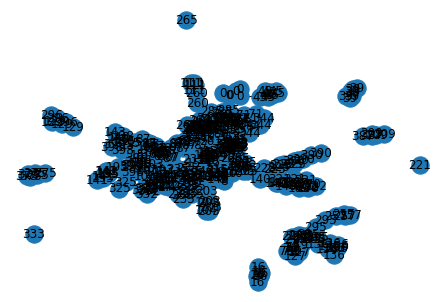

In [13]:

label_sorted=sorted(label_dict.items(),key=lambda x:x[1])
comm_list=np.zeros(G.number_of_nodes())
idx=0
last=label_sorted[0][1]
for i,j in label_sorted:
  if j>last:
    last=j
    idx+=1
  comm_list[i]=idx


print("NMI score for using paper Algorithm:  ",normalized_mutual_info_score(comm_lrf,comm_list))
nx.draw(G, labels=label_dict, with_labels = True)
plt.show()
